In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
del df['User ID']


In [11]:
df=pd.get_dummies(df,drop_first= True)

In [12]:
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [13]:
X=df.loc[:,['Age','EstimatedSalary','Gender_Male']]

In [31]:
Y = df.loc[:,['Purchased']].values

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc=StandardScaler()

In [34]:
x = sc.fit_transform(X)

In [35]:
x

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

In [38]:
Y = Y.reshape(-1)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_tr,X_ts,Y_tr,Y_ts=train_test_split(x,Y, random_state=10,test_size=0.2)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [42]:
acc_value=[]
err_value=[]

In [43]:
for k in range(1,30):
    model = KNeighborsClassifier(n_neighbors =k)
    model.fit(X_tr,Y_tr)
    Y_prediction = model.predict(X_ts)
    accuracy=accuracy_score(Y_ts,Y_prediction)
    acc_value.append(accuracy)
    err_value.append(1-accuracy)

In [44]:
import matplotlib.pyplot as plt

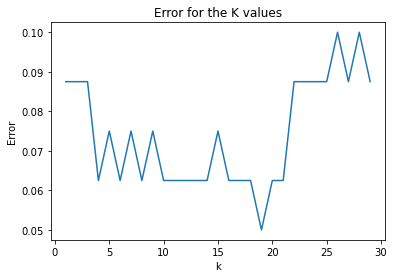

In [45]:
plt.plot(range(1,30),err_value)
plt.title('Error for the K values')
plt.xlabel('k')
plt.ylabel('Error')
plt.show()

In [51]:
model1 = KNeighborsClassifier(n_neighbors=19)
model1.fit(X_tr,Y_tr)
Y_prediction1 = model1.predict(X_ts)

In [52]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(Y_ts,Y_prediction1)

array([[49,  3],
       [ 1, 27]], dtype=int64)

In [55]:
accuracy_score(Y_ts,Y_prediction1)

0.95

In [56]:
import pickle

In [57]:
file = open('knn.pkl','wb')

In [60]:
pickle.dump(model1, file)